In [2]:
import cartopy.crs as ccrs
from cmocean import cm 
from dino import Experiment
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import cftime as cft
import xnemogcm as xn
import xgcm

In [3]:
path   = "/data/dkamm/nemo_output/DINO/"

dino_exp = Experiment(path, 'IPSL_Forcing/restart10')

In [3]:
path   = "/data/dkamm/nemo_output/DINO/"
dino_exp_hr_350 = Experiment(path, 'IPSL_Forcing_hr_350y')

In [4]:
dino_exp_hr_500 = Experiment(path, 'IPSL_Forcing_hr_500y')

In [5]:
dino_exp_T_star = Experiment(path, 'T_star_IPSL')

In [6]:
moc_350 = dino_exp_hr_350.get_MOC(var=(dino_exp_hr_350.data.voce - dino_exp_hr_350.data.voce_eiv))

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


In [7]:
moc_500 = dino_exp_hr_500.get_MOC(var=(dino_exp_hr_500.data.voce - dino_exp_hr_500.data.voce_eiv))

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


Text(0.5, 1.0, '')

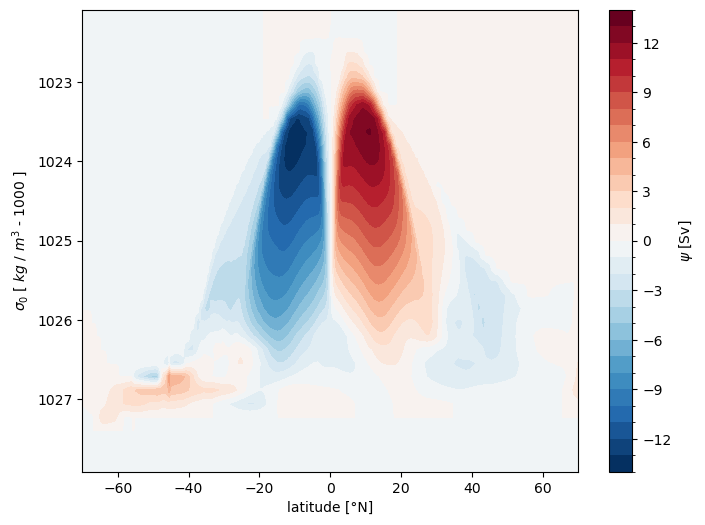

In [8]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
a = (-moc_500).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, add_colorbar=False)
cbar1 = fig.colorbar(a, ax=axs, label=r'$\psi$ [Sv]')
plt.xlabel('latitude [°N]')
axs.invert_yaxis()
plt.ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
plt.title('')

Text(0.5, 1.0, '')

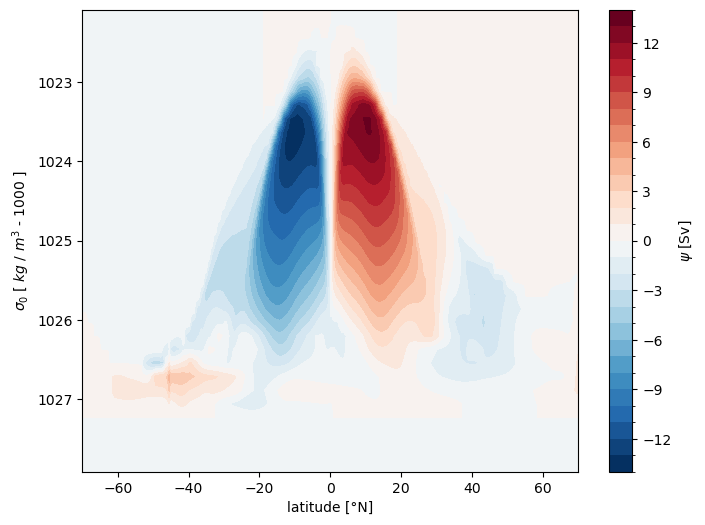

In [9]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
a = (-moc_350).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, add_colorbar=False)
cbar1 = fig.colorbar(a, ax=axs, label=r'$\psi$ [Sv]')
plt.xlabel('latitude [°N]')
axs.invert_yaxis()
plt.ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
plt.title('')

In [4]:
moc = dino_exp.get_MOC(var=(dino_exp.data.vocetr_eff))

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


Text(0.5, 1.0, '')

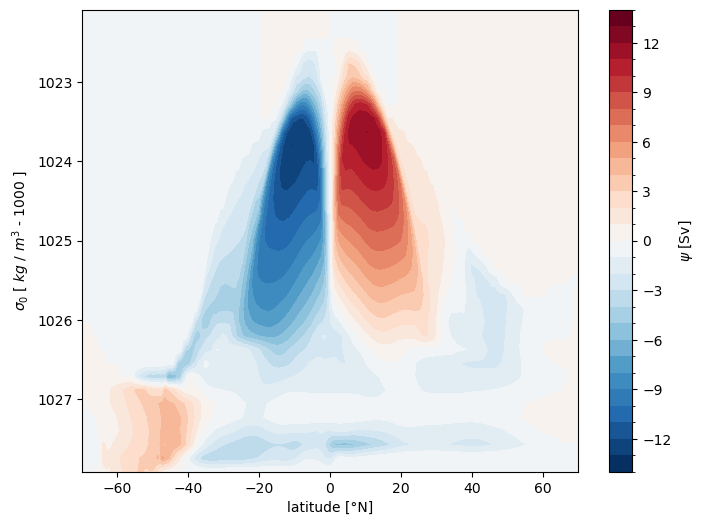

In [5]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
a = (-moc).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, add_colorbar=False)
cbar1 = fig.colorbar(a, ax=axs, label=r'$\psi$ [Sv]')
plt.xlabel('latitude [°N]')
axs.invert_yaxis()
plt.ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
plt.title('')

In [12]:
moc_T_star = dino_exp_T_star.get_MOC(var=(dino_exp_T_star.data.vocetr_eff))

/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(
/home/dkamm/miniconda3/envs/nemo_env/lib/python3.9/site-packages/xgcm/transform.py:247: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  out = xr.apply_ufunc(


Text(0.5, 1.0, '')

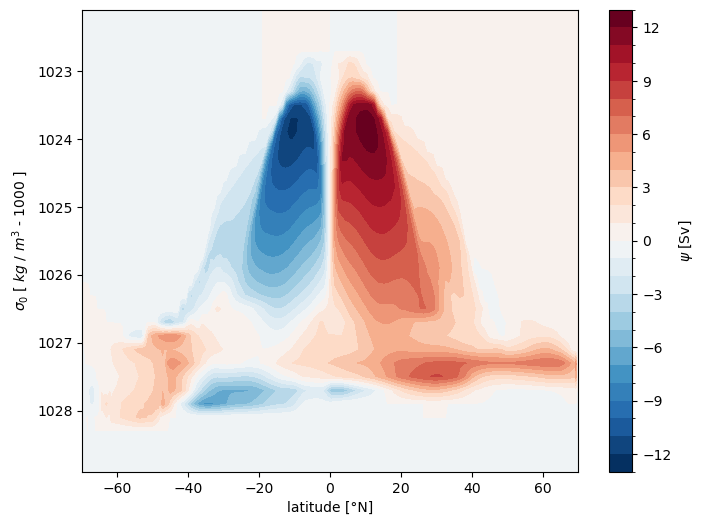

In [13]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
a = (-moc_T_star).plot.contourf(x='y_f', y='rhop', cmap='RdBu_r', levels=30, add_colorbar=False)
cbar1 = fig.colorbar(a, ax=axs, label=r'$\psi$ [Sv]')
plt.xlabel('latitude [°N]')
axs.invert_yaxis()
plt.ylabel(r'$\sigma_{0}$ [ $kg$ / $m^3$ - 1000 ]')
plt.title('')

In [14]:
v_tra_hr_500 = dino_exp_hr_500.data.e3v * dino_exp_hr_500.domain.e1v * dino_exp_hr_500.data.voce

In [6]:
bts = dino_exp.get_BTS()

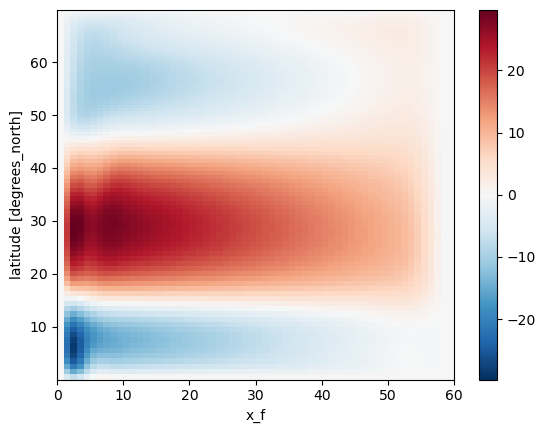

In [11]:
bts.isel(t_y=-1, y_f=slice(1,100)).plot(y='gphif')

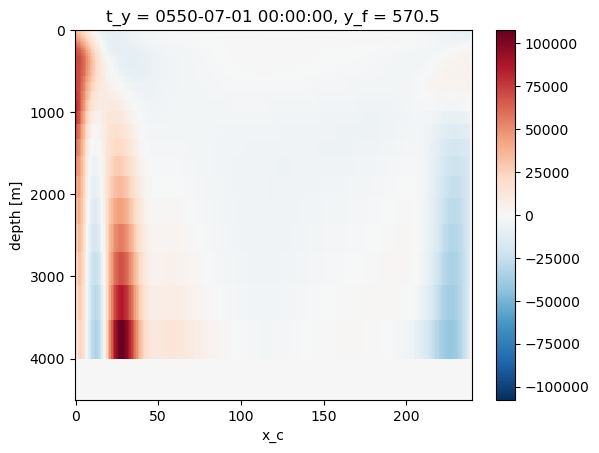

In [22]:
v_tra_hr_500.isel(y_f=570, t_y=-1).plot(y='gdept_1d', yincrease=False)

In [25]:
U_sq = dino_exp_hr_500.grid.interp(dino_exp_hr_500.data.uoce.isel(t_y=10), 'Y')**2 + dino_exp_hr_500.grid.interp(dino_exp_hr_500.data.voce.isel(t_y=10, z_c=0), 'X')**2

e3_on_f =  dino_exp_hr_500.grid.interp(dino_exp_hr_500.data.e3u.isel(t_y=10), 'Y')

In [40]:
E_kin = (U_sq * e3_on_f).sum('z_c') / 2

In [48]:
E_kin = E_kin.where(dino_exp_hr_350.domain.isel(z_c=0).fmask==1.0)

In [49]:
E_kin

<xarray.DataArray (y_f: 797, x_f: 240)>
dask.array<where, shape=(797, 240), dtype=float32, chunksize=(31, 20), chunktype=numpy.ndarray>
Coordinates:
  * x_f       (x_f) float64 0.5 1.5 2.5 3.5 4.5 ... 236.5 237.5 238.5 239.5
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 4.5 ... 793.5 794.5 795.5 796.5
    glamf     (y_f, x_f) float64 dask.array<chunksize=(31, 20), meta=np.ndarray>
    gphif     (y_f, x_f) float64 dask.array<chunksize=(31, 20), meta=np.ndarray>
    gdept_1d  float64 dask.array<chunksize=(), meta=np.ndarray>
    z_c       int64 0

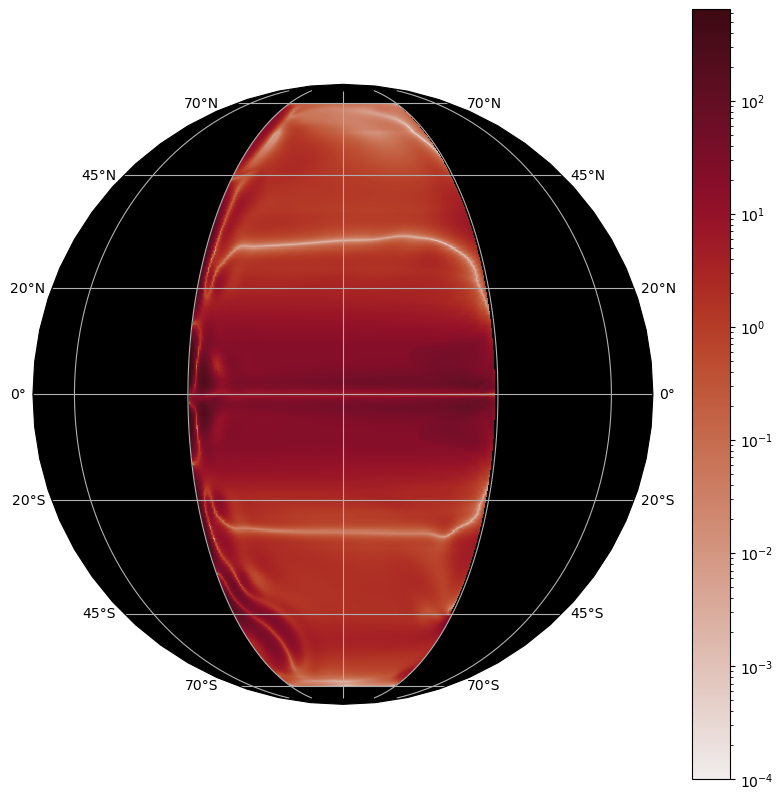

In [53]:
E_kin = E_kin.assign_coords({'x_globe': E_kin.glamf - 60})
plt.figure(figsize=(10,10))
p = E_kin.plot(
    y='gphif',
    x='x_globe',
    cmap=cm.amp,
    subplot_kws=dict(projection=ccrs.Orthographic(-30., 0.), facecolor="black"),
    
    transform=ccrs.PlateCarree(),

    add_colorbar=True,
    norm=colors.LogNorm()
)
plt.hlines(20, 0, 60, color='white')
p.axes.set_global()
#p.axes.coastlines(color='white', linewidth=3)
p.axes.gridlines(
    draw_labels=["x", "y", "left", "right", "geo"],
    ylocs=[-70, -45, -20, 0, 20, 45, 70],
    xlocs=[-90, -60, -30, 0, 30]
)
plt.title('')
plt.grid('m')
#plt.savefig('DINO_bathy.png', transparent=True)
plt.show()

In [11]:
(dino_exp_hr_350.data.rhop).isel(t_y=-1, z_c=slice(0,-1), x_c=slice(1,-1), y_c=slice(1,-1)).min().values

array(1022.25, dtype=float32)

In [13]:
isel = {'t_y':30}

Object `xr.ufuncs` not found.


In [ ]:
moc_350 = dino_exp_hr_350.get_MOC(var=(dino_exp_hr_350.data.voce + dino_exp_hr_350.data.voce_eiv) )

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp.get_ACC().isel(t_y=slice(340,550)).plot(color='black', ax=axs, label=r'1° resolution')
dino_exp_hr_350.get_ACC().plot(color='darkred', ax=axs, label=r'$\frac{1}{4}$° resolution')
dino_exp_hr_500.get_ACC().plot(color='darkred', ax=axs)
axs.set_ylabel('ACC transport [Sv]')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp.get_ACC().plot(color='black', ax=axs, label=r'1° resolution')
dino_exp_hr_350.get_ACC().plot(color='darkred', ax=axs, label=r'$\frac{1}{4}$° resolution')
dino_exp_hr_500.get_ACC().plot(color='darkred', ax=axs)
axs.set_ylabel('ACC transport [Sv]')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()

In [ ]:
Jul = dino_exp.data.mldr10_1.where(((dino_exp.data['t_m.year'] >= 980) & (dino_exp.data['t_m.month'] == 7) & (dino_exp.data['t_m.year'] <= 1000)), drop=True)
Feb = dino_exp.data.mldr10_1.where(((dino_exp.data['t_m.year'] >= 980) & (dino_exp.data['t_m.month'] == 2) & (dino_exp.data['t_m.year'] <= 1000)), drop=True)

In [ ]:
Feb.plot(col='t_m', col_wrap=4, y='gphit', x='glamt')

In [ ]:
dino_exp.data

In [ ]:
rho = dino_exp.get_rho()

In [ ]:
rho.isel(x_c=0, y_c=33, t_y=slice(449,454), z_c=0).plot(x='t_y', yincrease=False)

In [ ]:
path   = "/data/dkamm/nemo_output/DINO/"
dino_exp_hf = Experiment(path, 'IPSL_Forcing_hf2')

In [ ]:
climatology_mean = dino_exp_hf.data.groupby("t_m.month").mean("t_m")

In [ ]:
dino_exp_hf.data.rhop.isel(x_c=0, y_c=33, z_c=0)['t_y.month']#.plot(x='t_m', yincrease=False)

In [ ]:
(rho.isel(t_y=40, x_c=30, y_c=slice(5,50), z_c=slice(0,10))).plot.contourf(x='gphit', y='gdept_0', yincrease=False, levels=36)

In [ ]:
dino_exp.data.voce.isel(t_y=40, x_c=30, y_f=slice(5,50), z_c=slice(0,10)).plot.contourf(x='gphiv', y='gdept_1d', yincrease=False, levels=36)

In [ ]:
dino_exp.data.voce.isel(t_y=40, x_c=slice(0,-1), y_f=slice(5,50), z_c=0).plot.contourf(x='glamv', y='gphiv', yincrease=False, levels=36)

In [ ]:
dino_exp.data.mldr10_1.isel(t_m=slice(-120,-1)).groupby("t_m.month").mean().plot(col='month', col_wrap=4, y='gphit', x='glamt')

In [ ]:
dino_exp.data.mldr10_1.isel(t_m=slice(-1200,-1080)).groupby("t_m.month").mean().plot(col='month', col_wrap=4, y='gphit', x='glamt')

In [ ]:
(dino_exp.data.sss.isel(t_m=-1) - dino_exp.data.sss.isel(t_m=-1201)).plot(cmap=cm.balance)

In [ ]:
(dino_exp.data.sst.isel(t_m=-1) - dino_exp.data.sst.isel(t_m=-1201)).plot(cmap=cm.balance)

In [ ]:
import cartopy.crs as ccrs
from cmocean import cm 
from dino import Experiment
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
import xarray as xr
import cftime as cft
import xnemogcm as xn
import xgcm

In [ ]:
path   = "/data/dkamm/nemo_output/DINO/"
dino_exp_hf = Experiment(path, 'IPSL_Forcing_hf')

In [ ]:
dino_exp_hf.data.mldr10_1

In [ ]:
dino_exp_hf.data.mldr10_1.resample({'t_0':'A'}).mean().plot(col_wrap=2, col='t_0')

In [ ]:
dino_exp_hf.data.rhop.isel(x_c=1, y_c=slice(1,80), z_c=0).plot.contourf(x='t_m', y='gphit', levels=36)

In [ ]:
dino_exp_hf.data.sss.isel(x_c=-50, y_c=slice(1,80)).plot.contourf(x='t_m', y='gphit', levels=36)

In [ ]:
dino_exp_hf.data.rhop.isel(x_c=1, y_c=5, z_c=slice(0,-1)).plot.contourf(x='t_m', y='gdept_1d', levels=36, yincrease=False)

In [ ]:
dino_exp_hf.data.mldr10_1.isel(t_m=slice(0,10)).plot.contourf(x='glamt', y='gphit', levels=36, col_wrap=3, col='t_m')

In [ ]:
dino_exp_hf.data.uoce.isel(x_f=1, y_c=slice(1,55), z_c=0).plot.contourf(x='t_m', y='gphiu', levels=36)

In [ ]:
dino_exp_hf.data.rhop.isel(x_c=1, y_c=slice(-55,-5), z_c=0).plot.contourf(x='t_m', y='gphit', levels=36)

In [ ]:
rho_hf = dino_exp_hf.get_rho()

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp_hf.data.rhop.isel(x_c=0, y_c=33, z_c=0).plot(x='t_0')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,6))
dino_exp_hf.get_ACC().plot(color='black')
axs.set_ylabel('ACC transport [Sv]')
plt.title('')
plt.xlabel('time [years]')
plt.legend()
plt.grid()

In [ ]:
abs(dino_exp_hf.data.voce_eiv.isel(t_0=-1)).max('z_c').plot(x='glamv', y='gphiv')

In [ ]:
dino_exp_hf.data.aeiu_2d.isel(t_0=0).plot()

In [ ]:
dino_exp_hf.data.voce_eiv.isel(t_0=-1, x_c=3, z_c=slice(0,8)).plot(x='gphiv', y='gdept_1d', yincrease=False)

In [ ]:
rho_hf = dino_exp_hf.get_rho()

In [ ]:
rho_zonal = rho_hf.isel(x_c=slice(1,-1), y_c=slice(1,55), z_c=slice(0,-1)).mean('x_c')

In [ ]:
rho_zonal

In [ ]:
dino_exp_hf.data.t_m